In [9]:
!pip install torch torchvision transformers matplotlib


In [10]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-bcm937z5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-bcm937z5
  Resolved https://github.com/facebookresearch/detectron2.git to commit 536dc9d527074e3b15df5f6677ffe1f4e104a4ab
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.8 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp311

In [1]:
!pip install gradio opencv-python scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.4 MB/s eta 0:00:00


In [4]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print ("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print ("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
torch:  2.6 ; cuda:  cu124
detectron2: 0.6


In [5]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [7]:
# 🎨 Color palette for COCO, Cityscapes, and ADE20K datasets (combined sample)
def coco_panoptic_palette():
    return [
        (128,  64,128), (244,  35,232), ( 70,  70, 70), (102,102,156), (190,153,153),
        (153,153,153), (250,170, 30), (220,220,  0), (107,142, 35), (152,251,152),
        ( 70,130,180), (220, 20, 60), (255,  0,  0), (  0,  0,142), (  0,  0, 70),
        (  0, 60,100), (  0, 80,100), (  0,  0,230), (119, 11, 32),
        (120,120,120), (180,120,120), (  6,230,230), ( 80, 50, 50), (  4,200,  3),
        (120,120, 80), (140,140,140), (204,  5,255), (230,230,230), (  4,250,  7)
    ]


In [8]:
# 🎨 Cityscapes color palette (19 classes)
def cityscapes_palette():
    return [
        (128,  64,128),  # road
        (244,  35,232),  # sidewalk
        ( 70,  70, 70),  # building
        (102,102,156),  # wall
        (190,153,153),  # fence
        (153,153,153),  # pole
        (250,170, 30),  # traffic light
        (220,220,  0),  # traffic sign
        (107,142, 35),  # vegetation
        (152,251,152),  # terrain
        ( 70,130,180),  # sky
        (220, 20, 60),  # person
        (255,  0,  0),  # rider
        (  0,  0,142),  # car
        (  0,  0, 70),  # truck
        (  0, 60,100),  # bus
        (  0, 80,100),  # train
        (  0,  0,230),  # motorcycle
        (119, 11, 32)   # bicycle
    ]


In [9]:
# 🎨 ADE20K color palette (150 classes)
def ade20k_palette():
    return [
        (120, 120, 120), (180, 120, 120), (  6, 230,230), ( 80,  50,  50), (  4, 200,  3),
        (120, 120,  80), (140, 140, 140), (204,   5,255), (230,230,230), (  4, 250,  7),
        (224,   5,255), (235,255,  7), (150,  5, 61), (120,120, 70), (  8,255, 51),
        (255,  6, 82), (143,255,140), (204,255,  4), (255, 51,  7), (204, 70,  3),
        (  0,102,200), ( 61,230,250), (255,  6, 51), ( 11,102,255), (255,  7, 71),
        (255,  9,224), (  9,  7,230), (220,220,220), (255,  9, 92), (112,  9,255),
        (  8,255,214), (  7,255,224), (255,184,  6), ( 10,255, 71), (255, 41, 10),
        (  7,255,255), (224,255,  8), (102,  8,255), (255, 61,  6), (255,194,  7),
        (  6,255, 60), (255,157,  8), (255,255,255), (  7, 49,255), (224,255,244),
        (203,115,  0), (255,255,198), (  0,  0,255), (255,129,192), (255,255,  0),
        (255,  0,  0), (200,  0,255), (200,255,255), (200,255,  0), (200,  0,128),
        (100,  0,128), (200,  0,  0), (200,128,128), ( 60,128,128), (  0,  0,128),
        (128,  0,128), (128,  0,  0), ( 64,  0,128), ( 64,  0,  0), ( 64,128,128),
        (  0,128,192), (  0,  0, 64), (  0, 64, 64), (128,  0,192), (192,192,192),
        ( 64, 64,128), (192,  0,  0), (128,128,128), (128,128,  0), (192,128,128),
        (128,128, 64), (192,128,192), ( 64,128,192), (192,192,  0), (128, 64, 64),
        ( 64,  0, 64), (192,  0,128), (128,  0, 64), ( 64,128, 64), ( 64,  0,192),
        (128, 64,128), (192,  0,192), ( 64,192,128), (128,128,192), (192, 64, 64),
        ( 64,192,  0), (192, 64,128), (128, 64,192), (192,128, 64), ( 64, 64, 64),
        (192,192,128), (128,  0,192), ( 64,192,192), (128,128,  0), (128,192,192),
        (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0),
        (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0),
        (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0),
        (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0),
        (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0),
        (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0),
        (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0),
        (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0),
        (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0), (  0,  0,  0)
    ]


In [10]:
import torch
import random
import numpy as np
from PIL import Image
from collections import defaultdict
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode, Visualizer
from transformers import MaskFormerImageProcessor, Mask2FormerForUniversalSegmentation

In [11]:
from transformers import Mask2FormerConfig, Mask2FormerModel

In [12]:
configuration = Mask2FormerConfig()
model = Mask2FormerModel(configuration)
configuration = model.config
configuration

Mask2FormerConfig {
  "_attn_implementation_autoset": true,
  "activation_function": "relu",
  "backbone": null,
  "backbone_config": {
    "attention_probs_dropout_prob": 0.0,
    "depths": [
      2,
      2,
      18,
      2
    ],
    "drop_path_rate": 0.3,
    "embed_dim": 96,
    "encoder_stride": 32,
    "hidden_act": "gelu",
    "hidden_dropout_prob": 0.0,
    "hidden_size": 768,
    "image_size": 224,
    "initializer_range": 0.02,
    "layer_norm_eps": 1e-05,
    "mlp_ratio": 4.0,
    "model_type": "swin",
    "num_channels": 3,
    "num_heads": [
      3,
      6,
      12,
      24
    ],
    "num_layers": 4,
    "out_features": [
      "stage1",
      "stage2",
      "stage3",
      "stage4"
    ],
    "out_indices": [
      1,
      2,
      3,
      4
    ],
    "patch_size": 4,
    "qkv_bias": true,
    "stage_names": [
      "stem",
      "stage1",
      "stage2",
      "stage3",
      "stage4"
    ],
    "use_absolute_embeddings": false,
    "window_size": 7
  },
  "

In [13]:
def load_model_and_processor(model_ckpt: str):
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model = Mask2FormerForUniversalSegmentation.from_pretrained(model_ckpt).to(torch.device(device))
  model.eval()
  image_preprocessor = MaskFormerImageProcessor.from_pretrained(model_ckpt)
  return model, image_preprocessor

In [14]:
# Choose what model to download from Huggingface for SEMANTIC or PANOPTIC task:
def load_default_ckpt(segmentation_task: str):
    if segmentation_task == "semantic":
        default_pretrained_ckpt = "facebook/mask2former-swin-base-ade-semantic"  # or 'facebook/mask2former-swin-large'
    elif segmentation_task == "panoptic":
        default_pretrained_ckpt = "facebook/mask2former-swin-large-coco-panoptic"
    else:
        raise ValueError("Unsupported segmentation task. Choose 'semantic' or 'panoptic'.")
    return default_pretrained_ckpt


# Draw panoptic segmentation prediction on the input image
def draw_panoptic_segmentation(predicted_segmentation_map, seg_info, image):
    metadata = MetadataCatalog.get("coco_2017_val_panoptic")

    for res in seg_info:
        res['category_id'] = res.pop('label_id')
        pred_class = res['category_id']
        isthing = pred_class in metadata.thing_dataset_id_to_contiguous_id.values()
        res['isthing'] = bool(isthing)
    visualizer = Visualizer(np.array(image)[:, :, ::-1], metadata=metadata, instance_mode=1)  # instance_mode=1 is Image color
    out = visualizer.draw_panoptic_seg_predictions(
        predicted_segmentation_map.cpu(), seg_info, alpha=0.5
    )
    output_img = Image.fromarray(out.get_image()[:, :, ::-1])  # Convert back to RGB
    return output_img

In [15]:
# Draw semantic segmentation with custom color palette
def draw_semantic_segmentation(segmentation_map, image, palette):
    color_segmentation_map = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8)
    for label, color in enumerate(palette):
        color_segmentation_map[segmentation_map == label] = color

    # Blend image and segmentation
    ground_truth_color_seg = color_segmentation_map
    img = np.array(image) * 0.5 + ground_truth_color_seg * 0.5
    img = img.astype(np.uint8)
    return Image.fromarray(img)


In [16]:
def predict_masks(input_img_path: str, segmentation_task: str):
    # Load model checkpoints and image processor for it
    default_pretrained_ckpt = load_default_ckpt(segmentation_task)
    model, image_processor = load_model_and_processor(default_pretrained_ckpt, device)

    # Load and preprocess the image
    image = Image.open(input_img_path)
    inputs = image_processor(images=image, return_tensors="pt").to(torch.device(device))

    # Forward pass through the model
    with torch.no_grad():
        outputs = model(**inputs)

    # Postprocess and visualize output
    if segmentation_task == "semantic":
        result = image_processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
        predicted_segmentation_map = result.cpu().numpy()
        palette = ade_palette()
        output_result = draw_semantic_segmentation(predicted_segmentation_map, image, palette)
    else:
        result = image_processor.post_process_panoptic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
        predicted_segmentation_map = result["segmentation"]
        seg_info = result["segments_info"]
        output_result = draw_panoptic_segmentation(predicted_segmentation_map, seg_info, image)

    return output_result


In [24]:

def load_model_and_processor(model_ckpt: str, device: str):
    model = Mask2FormerForUniversalSegmentation.from_pretrained(model_ckpt).to(torch.device(device))
    model.eval()
    image_preprocessor = MaskFormerImageProcessor.from_pretrained(model_ckpt)
    return model, image_preprocessor

# Choose what model to download from Huggingface for SEMANTIC or PANOPTIC task:
def load_default_ckpt(segmentation_task: str):
    if segmentation_task == "semantic":
        default_pretrained_ckpt = "facebook/mask2former-swin-base-ade-semantic"  # or 'facebook/mask2former-swin-large'
    elif segmentation_task == "panoptic":
        default_pretrained_ckpt = "facebook/mask2former-swin-large-coco-panoptic"
    else:
        raise ValueError("Unsupported segmentation task. Choose 'semantic' or 'panoptic'.")
    return default_pretrained_ckpt

# Draw panoptic segmentation prediction on the input image
def draw_panoptic_segmentation(predicted_segmentation_map, seg_info, image):
    metadata = MetadataCatalog.get("coco_2017_val_panoptic")

    for res in seg_info:
        res['category_id'] = res.pop('label_id')
        pred_class = res['category_id']
        isthing = pred_class in metadata.thing_dataset_id_to_contiguous_id.values()
        res['isthing'] = bool(isthing)
    visualizer = Visualizer(np.array(image)[:, :, ::-1], metadata=metadata, instance_mode=1)  # instance_mode=1 is Image color
    out = visualizer.draw_panoptic_seg_predictions(
        predicted_segmentation_map.cpu(), seg_info, alpha=0.5
    )
    output_img = Image.fromarray(out.get_image()[:, :, ::-1])  # Convert back to RGB
    return output_img

# Draw semantic segmentation with custom color palette
def draw_semantic_segmentation(segmentation_map, image, palette):
    color_segmentation_map = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8)
    for label, color in enumerate(palette):
        color_segmentation_map[segmentation_map == label] = color

    # Blend image and segmentation
    ground_truth_color_seg = color_segmentation_map
    img = np.array(image) * 0.5 + ground_truth_color_seg * 0.5
    img = img.astype(np.uint8)
    return Image.fromarray(img)

def predict_masks(input_img_path: str, segmentation_task: str):
    # Define device
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load model checkpoints and image processor for it
    default_pretrained_ckpt = load_default_ckpt(segmentation_task)
    model, image_processor = load_model_and_processor(default_pretrained_ckpt, device)

    # Load and preprocess the image
    image = Image.open(input_img_path)
    inputs = image_processor(images=image, return_tensors="pt").to(torch.device(device))

    # Forward pass through the model
    with torch.no_grad():
        outputs = model(**inputs)

    # Postprocess and visualize output
    if segmentation_task == "semantic":
        result = image_processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
        predicted_segmentation_map = result.cpu().numpy()
        palette = ade_palette()
        output_result = draw_semantic_segmentation(predicted_segmentation_map, image, palette)
    else:
        result = image_processor.post_process_panoptic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
        predicted_segmentation_map = result["segmentation"]
        seg_info = result["segments_info"]
        output_result = draw_panoptic_segmentation(predicted_segmentation_map, seg_info, image)

    return output_result


config.json:   0%|          | 0.00/82.2k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/866M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/866M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/538 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: UserWarning: The following named arguments are not valid for `MaskFormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)
`label_ids_to_fuse` unset. No instance will be fused.


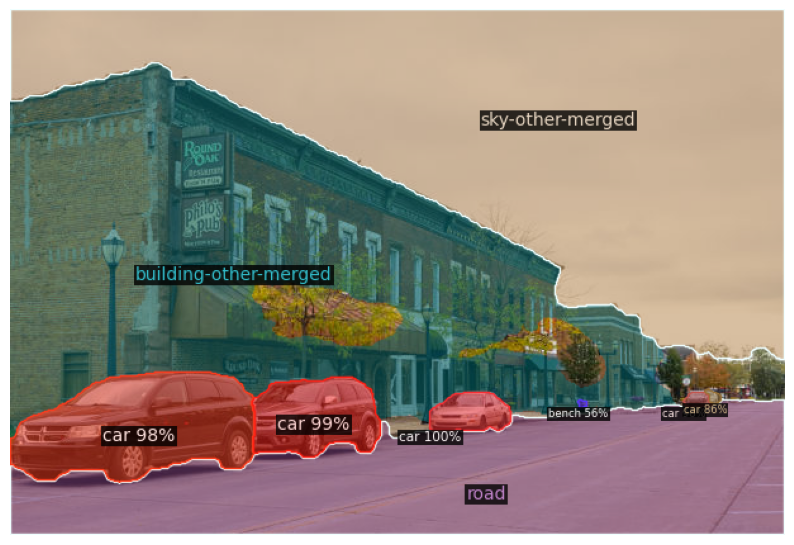

In [25]:
import matplotlib.pyplot as plt

def display_segmentation_output(output_img):
    # Display the segmented output image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(output_img)
    plt.axis('off')  # Hide axes
    plt.show()

# Call the function to display the result
output_img = predict_masks(input_img_path="/content/segmentation_input.jpg", segmentation_task="panoptic")
display_segmentation_output(output_img)


In [ ]:
import numpy as np
import torch
from PIL import Image
from collections import defaultdict

def calculate_panoptic_quality(pred_segmentation, pred_info, gt_segmentation, gt_info):
    """
    Calculate Panoptic Quality (PQ) between predicted and ground truth segmentation
    
    PQ = SQ × RQ
    where:
    - SQ (Segmentation Quality): IoU averaged over matched segments
    - RQ (Recognition Quality): F1-score of segment matching
    
    Args:
        pred_segmentation: Tensor of predicted segmentation with unique IDs
        pred_info: List of dictionaries with segment info for predictions
        gt_segmentation: Tensor of ground truth segmentation with unique IDs
        gt_info: List of dictionaries with segment info for ground truth
    
    Returns:
        dict: PQ metrics including overall PQ, SQ, RQ and PQ for things/stuff
    """
    # Create mappings from segment IDs to class IDs
    pred_id_to_class_id = {s['id']: s['category_id'] for s in pred_info}
    gt_id_to_class_id = {s['id']: s['category_id'] for s in gt_info}
    
    # Create mappings to track things vs stuff
    pred_id_to_isthing = {s['id']: s.get('isthing', False) for s in pred_info}
    gt_id_to_isthing = {s['id']: s.get('isthing', False) for s in gt_info}
    
    # Get unique segment IDs from both predictions and ground truth
    pred_ids = set(pred_id_to_class_id.keys())
    gt_ids = set(gt_id_to_class_id.keys())
    
    # Calculate IoU for each pair of segments (pred_id, gt_id)
    ious = {}
    for pred_id in pred_ids:
        pred_mask = (pred_segmentation == pred_id)
        pred_class = pred_id_to_class_id[pred_id]
        
        for gt_id in gt_ids:
            gt_mask = (gt_segmentation == gt_id)
            gt_class = gt_id_to_class_id[gt_id]
            
            # Only calculate IoU if they belong to the same class
            if pred_class == gt_class:
                intersection = (pred_mask & gt_mask).sum().item()
                union = (pred_mask | gt_mask).sum().item()
                iou = intersection / union if union > 0 else 0
                ious[(pred_id, gt_id)] = iou
    
    # Matching based on IoU threshold (typically 0.5)
    iou_threshold = 0.5
    matches = set()
    matched_pred_ids = set()
    matched_gt_ids = set()
    
    # Sort IoUs in descending order and perform matching
    sorted_ious = sorted(ious.items(), key=lambda x: x[1], reverse=True)
    for (pred_id, gt_id), iou in sorted_ious:
        if iou >= iou_threshold and pred_id not in matched_pred_ids and gt_id not in matched_gt_ids:
            matches.add((pred_id, gt_id))
            matched_pred_ids.add(pred_id)
            matched_gt_ids.add(gt_id)
    
    # Calculate metrics
    tp = len(matches)  # True positives (matched segments)
    fp = len(pred_ids) - tp  # False positives (unmatched predictions)
    fn = len(gt_ids) - tp  # False negatives (unmatched ground truth)
    
    # Calculate SQ (average IoU of matched segments)
    sq = sum(ious[match] for match in matches) / tp if tp > 0 else 0
    
    # Calculate RQ (F1 score)
    rq = tp / (tp + 0.5 * fp + 0.5 * fn) if (tp + 0.5 * fp + 0.5 * fn) > 0 else 0
    
    # Calculate PQ
    pq = sq * rq
    
    # Calculate separate metrics for things and stuff
    things_matches = [(p, g) for p, g in matches 
                     if pred_id_to_isthing[p] and gt_id_to_isthing[g]]
    stuff_matches = [(p, g) for p, g in matches 
                    if not pred_id_to_isthing[p] and not gt_id_to_isthing[g]]
    
    # Things metrics
    things_pred_ids = {p for p in pred_ids if pred_id_to_isthing[p]}
    things_gt_ids = {g for g in gt_ids if gt_id_to_isthing[g]}
    
    things_tp = len(things_matches)
    things_fp = len(things_pred_ids) - things_tp
    things_fn = len(things_gt_ids) - things_tp
    
    things_sq = sum(ious[match] for match in things_matches) / things_tp if things_tp > 0 else 0
    things_rq = things_tp / (things_tp + 0.5 * things_fp + 0.5 * things_fn) if (things_tp + 0.5 * things_fp + 0.5 * things_fn) > 0 else 0
    things_pq = things_sq * things_rq
    
    # Stuff metrics
    stuff_pred_ids = {p for p in pred_ids if not pred_id_to_isthing[p]}
    stuff_gt_ids = {g for g in gt_ids if not gt_id_to_isthing[g]}
    
    stuff_tp = len(stuff_matches)
    stuff_fp = len(stuff_pred_ids) - stuff_tp
    stuff_fn = len(stuff_gt_ids) - stuff_tp
    
    stuff_sq = sum(ious[match] for match in stuff_matches) / stuff_tp if stuff_tp > 0 else 0
    stuff_rq = stuff_tp / (stuff_tp + 0.5 * stuff_fp + 0.5 * stuff_fn) if (stuff_tp + 0.5 * stuff_fp + 0.5 * stuff_fn) > 0 else 0
    stuff_pq = stuff_sq * stuff_rq
    
    return {
        "PQ": pq,
        "SQ": sq,
        "RQ": rq,
        "PQ_th": things_pq,
        "SQ_th": things_sq,
        "RQ_th": things_rq,
        "PQ_st": stuff_pq,
        "SQ_st": stuff_sq,
        "RQ_st": stuff_rq,
        "TP": tp,
        "FP": fp,
        "FN": fn
    }

# Function to evaluate model on a dataset
def evaluate_panoptic_segmentation(model, image_processor, image_paths, gt_segmentations, gt_infos, device):
    """
    Evaluate panoptic segmentation model on a dataset and calculate PQ metrics
    
    Args:
        model: Mask2Former model
        image_processor: MaskFormerImageProcessor
        image_paths: List of paths to input images
        gt_segmentations: List of ground truth segmentation maps (tensors)
        gt_infos: List of ground truth segment info lists
        device: Device to run inference on (cuda/cpu)
    
    Returns:
        dict: Average PQ metrics over the dataset
    """
    metrics_sum = defaultdict(float)
    
    for i, image_path in enumerate(image_paths):
        # Load and preprocess image
        image = Image.open(image_path)
        inputs = image_processor(images=image, return_tensors="pt").to(device)
        
        # Forward pass
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Post-process to get segmentation
        result = image_processor.post_process_panoptic_segmentation(
            outputs, target_sizes=[image.size[::-1]])[0]
        
        pred_segmentation = result["segmentation"]
        pred_info = result["segments_info"]
        
        # Fix and complete segment info (add isthing field)
        for seg in pred_info:
            seg['category_id'] = seg.pop('label_id')
            # You need to define which categories are "things" vs "stuff"
            # This usually comes from your dataset metadata
            # For simplicity in this example, let's assume we have access to this info:
            category_id = seg['category_id']
            from detectron2.data import MetadataCatalog
            metadata = MetadataCatalog.get("coco_2017_val_panoptic")
            isthing = category_id in metadata.thing_dataset_id_to_contiguous_id.values()
            seg['isthing'] = bool(isthing)
        
        # Calculate metrics for this image
        metrics = calculate_panoptic_quality(
            pred_segmentation, pred_info, 
            gt_segmentations[i], gt_infos[i]
        )
        
        # Add to sum for averaging
        for k, v in metrics.items():
            metrics_sum[k] += v
    
    # Calculate averages
    num_images = len(image_paths)
    avg_metrics = {k: v / num_images for k, v in metrics_sum.items()}
    
    return avg_metrics

# Example usage (assuming you have ground truth data):
# metrics = evaluate_panoptic_segmentation(model, image_processor, 
#                                         image_paths=["path/to/img1.jpg", "path/to/img2.jpg"],
#                                         gt_segmentations=[gt_seg1, gt_seg2],
#                                         gt_infos=[gt_info1, gt_info2],
#                                         device=device)
# print(f"Panoptic Quality: {metrics['PQ']:.4f}")
# print(f"PQ for things: {metrics['PQ_th']:.4f}")
# print(f"PQ for stuff: {metrics['PQ_st']:.4f}")